# Read netCDF file

[NetCDF](https://www.unidata.ucar.edu/software/netcdf/) is a powerful file format that can store efficiently multiple scientific variables sharing the same multiple dimensions. For example, in climate science, temperature, precipitation, radiation can be stored in four dimensions: one time dimension and three spatial dimensions (longitude, latitude, altitude).
NetCDF format is also versatile as the dimensions can be anything pre-defined and shared between the variables, not necessarily spatial coordinates as in climate science.
For this reason, it is also increasingly used in the energy system modelling community.

We provide a function in the [pyam](https://github.com/IAMconsortium/pyam) package (pyam.read_netcdf) to read a netCDF file into the IamDataFrame format following the standard by the Integrated Assessment Modeling Consortium ([IAMC](https://www.iamconsortium.org/)). [Read the docs](https://pyam-iamc.readthedocs.io/en/stable/data.html) provides more information on this format.

To use `pyam.read_netcdf`, the netCDF input file should have the following structure:
- Variables should have four dimensions, namely model, scenario, region, and time.
They are defined in pyam as IAMC indices (`IAMC_IDX`).
- Meta indicators should have two dimensions, namely model and scenario (`META_IDX`)

The package `xarray` provides a nice tool to handle netCDF data with indexing and similar numpy dataframe for each variable 

In [2]:
import xarray as xr

ds = xr.open_dataset("test_df.nc")
ds

<xarray.Dataset> Size: 128B
Dimensions:              (scenario: 2, time: 2, model: 1, region: 1)
Coordinates:
  * scenario             (scenario) object 16B 'scen_a' 'scen_b'
  * time                 (time) int32 8B 2005 2010
  * model                (model) object 8B 'model_a'
  * region               (region) object 8B 'World'
Data variables:
    Primary Energy       (time, model, scenario, region) float64 32B ...
    Primary Energy|Coal  (time, model, scenario, region) float64 32B ...
    string               (model, scenario) object 16B ...
    number               (model, scenario) int32 8B ...
Attributes:
    Information:  Created based on test_df from pyam.test_io to test the func...

 Additionally, variables have two attributes, namely `long name` and `unit`. The `long name` of each variable in netCDF file will be used as its variable name in IamDataFrame. This is to bridge the differentce in naming convention of variables between netCDF file with underscores, e.g., `Primary_Energy__Coal`, and the IAMC naming convention with spaces and `|`, e.g., `Primary Energy|Coal`.

In [3]:
ds["Primary Energy"]

<xarray.DataArray 'Primary Energy' (time: 2, model: 1, scenario: 2, region: 1)> Size: 32B
[4 values with dtype=float64]
Coordinates:
  * scenario  (scenario) object 16B 'scen_a' 'scen_b'
  * time      (time) int32 8B 2005 2010
  * model     (model) object 8B 'model_a'
  * region    (region) object 8B 'World'
Attributes:
    unit:       EJ/yr
    long_name:  Primary Energy

The function pyam.read_netcdf can read data in both year-based and timeseries format. 
The output would have a year or time coordinate respectively.

If the file contains metadata, they should also be store as variables but with two dimensions
model and scenario. These two dimensions are definded as meta indices META_IDX in pyam.
In the output IamDataFrame, they are read separately and called Meta indicators

If there are any other variables contain different dimensions in the above structure, the function will throw an error.

The output of the pyam.read_netcdf function has the IamDataFrame format. It has two indices model and scenario, four coordinates region, variable, unit, year or time depending on the input netCDF file, and meta indicators if available. More information about IamDataFrame and meta indicators in the pyam package can be found in the [pyam software tool article](https://open-research-europe.ec.europa.eu/articles/1-74).

In [4]:
import pyam

df = pyam.read_netcdf("test_df.nc")
df

<class 'pyam.core.IamDataFrame'>
Index:
 * model    : model_a (1)
 * scenario : scen_a, scen_b (2)
Timeseries data coordinates:
   region   : World (1)
   variable : Primary Energy, Primary Energy|Coal (2)
   unit     : EJ/yr (1)
   year     : 2005, 2010 (2)
Meta indicators:
   string (object) foo, nan (2)
   number (int32) 1, 2 (2)

This output dataframe has all the functions as in the IamDataFrame class from pyam. For example, select one variable, aggregated with all the regions then plot with coloured by scenario.
See more tutorials for pyam IamDataFrame in [Read the docs](https://pyam-iamc.readthedocs.io/en/stable/tutorials/pyam_first_steps.html).

**Note** </br>
The following netCDF file is an output from the model [Calliope](https://calliope.readthedocs.io/) for illustration. The data are not save with the Jupyter notebook and only the plot is saved directly.

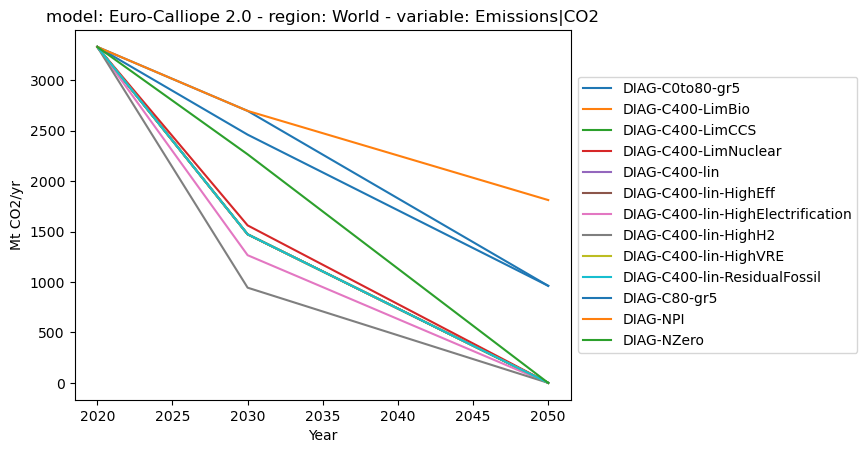

In [6]:
df = pyam.read_netcdf("iamc_year_based.nc")

ax = df.aggregate_region("Emissions|CO2", components=True).plot(
    color="scenario", legend=dict(loc="center left", bbox_to_anchor=(1.0, 0.5))
)